In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.neural_network import MLPClassifier
sns.set(style="darkgrid", palette="deep")
%matplotlib inline

In [49]:
dataset=pd.read_csv('../winequality-red.csv', delimiter=";")

# <h1>Dataset </h1>
<h3> General Information of dataset</h3>

In [50]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### First 5 elements of dataset

In [51]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h3>Quality Counts </h3> 

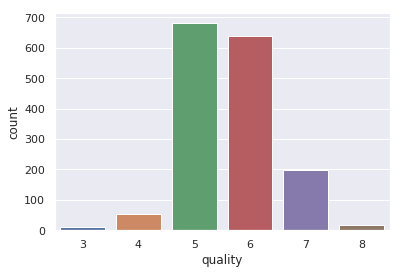

In [52]:
sns.countplot(x=dataset.quality,data=dataset)

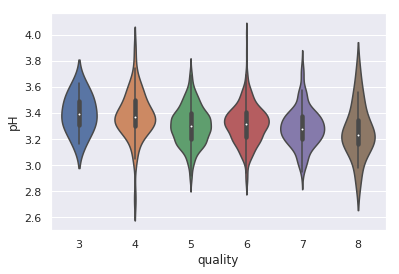

In [53]:
sns.violinplot(x=dataset.quality, y=dataset.pH)

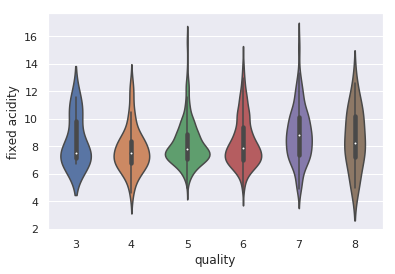

In [54]:
sns.violinplot(x=dataset.quality, y=dataset["fixed acidity"])

<h3> Normalize data </h3>

In [55]:
min_max_scaler = preprocessing.MinMaxScaler()
dataset_without_output = dataset[dataset.columns[:-1]]
scaled_dataset_without_output = min_max_scaler.fit_transform(dataset_without_output.values)
scaled_dataset_without_output_df = pd.DataFrame(scaled_dataset_without_output, columns= dataset.columns[:-1])
scaled_dataset_without_output_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


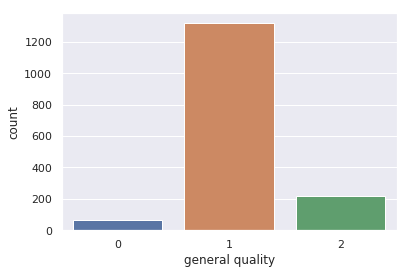

In [56]:
all_qualities = dataset[dataset.columns[-1]]
general_qualities = list()
for quality in all_qualities:
    if quality >=1 and quality <= 4:
        general_qualities.append(0)
    elif quality >=5 and quality <= 6:
        general_qualities.append(1)
    else:
        general_qualities.append(2)
        
dataset["general quality"] = general_qualities
sns.countplot(x=dataset["general quality"],data=dataset)

<h3> Output data </h3>

In [57]:
output_data = dataset[dataset.columns[-1]]
output_data.head()

0    1
1    1
2    1
3    1
4    1
Name: general quality, dtype: int64

# TRAIN 


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

##### train test split %20 test %80 train

In [59]:
 X_train, X_test, y_train, y_test = train_test_split(scaled_dataset_without_output, output_data, test_size=0.20, random_state=np.random)

### SVM

In [85]:
clf = SVC(kernel='rbf', C=10, gamma=10)
clf.fit(X_train, y_train) 
y_pred =clf.predict(X_test)

In [86]:
train_accuracy = accuracy_score(y_test, y_pred)
print("train accuracy :" + str(train_accuracy))
test_accuracy = accuracy_score(y_train, clf.predict(X_train))
print("test accuracy :" + str(test_accuracy))

train accuracy :0.846875
test accuracy :0.9569976544175137


### Multilayer perceptron


In [97]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=500)
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("total iteration count: " + str(clf.n_iter_))

total iteration count: 501


In [98]:
mlp_train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print("train accuracy: " + str(mlp_train_accuracy))
mlp_test_accuracy = accuracy_score(y_test, y_pred)
print("test accuracy: " + str(mlp_test_accuracy))

train accuracy: 0.8569194683346364
test accuracy: 0.853125
